# Klasifikasi Jenis Kopra Berdasarkan Ekstraksi Fitur Menggunakan Metode Ensambel Learning

In [1]:
# library untuk manipulasi data
import pandas as pd
import numpy as np

# library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk praproses data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# library untuk model klasifikasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

## 1. Akuisisi Data

In [2]:
# load dataset
dataset = pd.read_csv("dataset/ekstrasi-fitur-kopra-nonTelungkup.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean-R           1839 non-null   float64
 1   Mean-G           1839 non-null   float64
 2   Mean-B           1839 non-null   float64
 3   Mean-H           1839 non-null   float64
 4   Mean-V           1839 non-null   float64
 5   Mean-S           1839 non-null   float64
 6   Mean-Gray        1839 non-null   float64
 7   Standar-Deviasi  1839 non-null   float64
 8   Luas             1839 non-null   float64
 9   Perimeter        1839 non-null   float64
 10  Contrast         1839 non-null   float64
 11  Dissimilarity    1839 non-null   float64
 12  Homogeneity      1839 non-null   float64
 13  Energy           1839 non-null   float64
 14  Correlation      1839 non-null   float64
 15  Jenis Kopra      1839 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 230.0 KB


In [4]:
dataset.describe()

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,81.020750,67.117666,50.377857,12.739430,81.093483,68.252834,69.369837,52.684988,8136.767809,701.574270,69.925258,4.203152,0.466596,0.259594,0.986388,2.000000
std,17.575378,17.593451,14.514701,6.930784,17.569546,17.446976,16.825835,9.524066,13011.715408,667.754673,34.695929,1.249612,0.056876,0.042660,0.008067,0.816719
min,30.556322,19.653977,15.734759,3.153138,30.572092,19.010904,22.464092,20.503420,0.000000,0.000000,21.938480,2.146624,0.307204,0.171859,0.920092,1.000000
25%,68.835589,54.415539,39.790509,9.300176,68.854501,56.029231,57.338926,46.351015,562.500000,230.450791,47.153494,3.302342,0.425960,0.233576,0.983497,1.000000
50%,80.388866,66.794438,50.359408,12.087998,80.399455,67.305323,68.924920,52.591468,2964.000000,598.641696,58.921316,3.889533,0.466074,0.250399,0.988635,2.000000
75%,93.768829,79.335187,59.820183,15.001382,93.801085,78.947500,80.964257,58.842228,10970.000000,921.962545,83.403973,4.854590,0.507364,0.271685,0.992103,3.000000
max,134.861606,121.998932,99.756737,100.330030,134.863778,128.910255,123.295228,90.835493,171997.000000,6054.448492,330.264746,10.858529,0.651113,0.552925,0.996380,3.000000


In [5]:
dataset

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
0,99.773521,85.299275,72.579287,11.272002,99.790564,51.024430,88.194361,54.589283,7933.5,2053.304813,43.446592,3.341010,0.482040,0.228214,0.992673,1
1,114.162680,110.424945,91.145820,19.004362,114.828220,36.871844,109.358078,79.939335,33489.0,1334.846881,68.707317,4.141485,0.473652,0.276339,0.994604,1
2,86.758669,77.095795,58.220201,14.373916,86.760449,58.789938,77.833540,52.085072,1958.5,573.854899,37.735027,2.917397,0.522134,0.235533,0.993003,1
3,80.397565,71.179438,55.914561,12.919370,80.399455,52.578421,72.236527,52.309291,2908.0,862.974738,34.472291,2.606145,0.564898,0.263945,0.993672,1
4,98.963501,89.047011,68.021703,14.364193,98.967445,56.023626,89.634465,63.758414,31867.5,706.139171,51.521890,3.058260,0.540560,0.257608,0.993635,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,65.699660,53.850925,38.519917,13.248285,65.721652,78.245893,55.645991,38.131158,274.5,94.811182,55.969590,3.634905,0.447004,0.208672,0.980648,3
1835,56.106737,52.090796,39.024309,20.334565,57.659902,63.258781,51.805075,35.666622,513.0,153.823374,87.985303,5.197024,0.365003,0.205804,0.965234,3
1836,57.391588,46.502171,29.440257,12.424623,57.392332,83.297692,47.825175,37.250296,150.0,172.852812,76.820177,4.526500,0.429701,0.269837,0.972228,3
1837,66.604633,58.945218,41.088255,14.977646,66.606838,68.809220,59.213463,41.047882,342.0,171.053823,68.501078,4.402618,0.428551,0.243647,0.979578,3


## 2. Eksplorasi Data Analisis

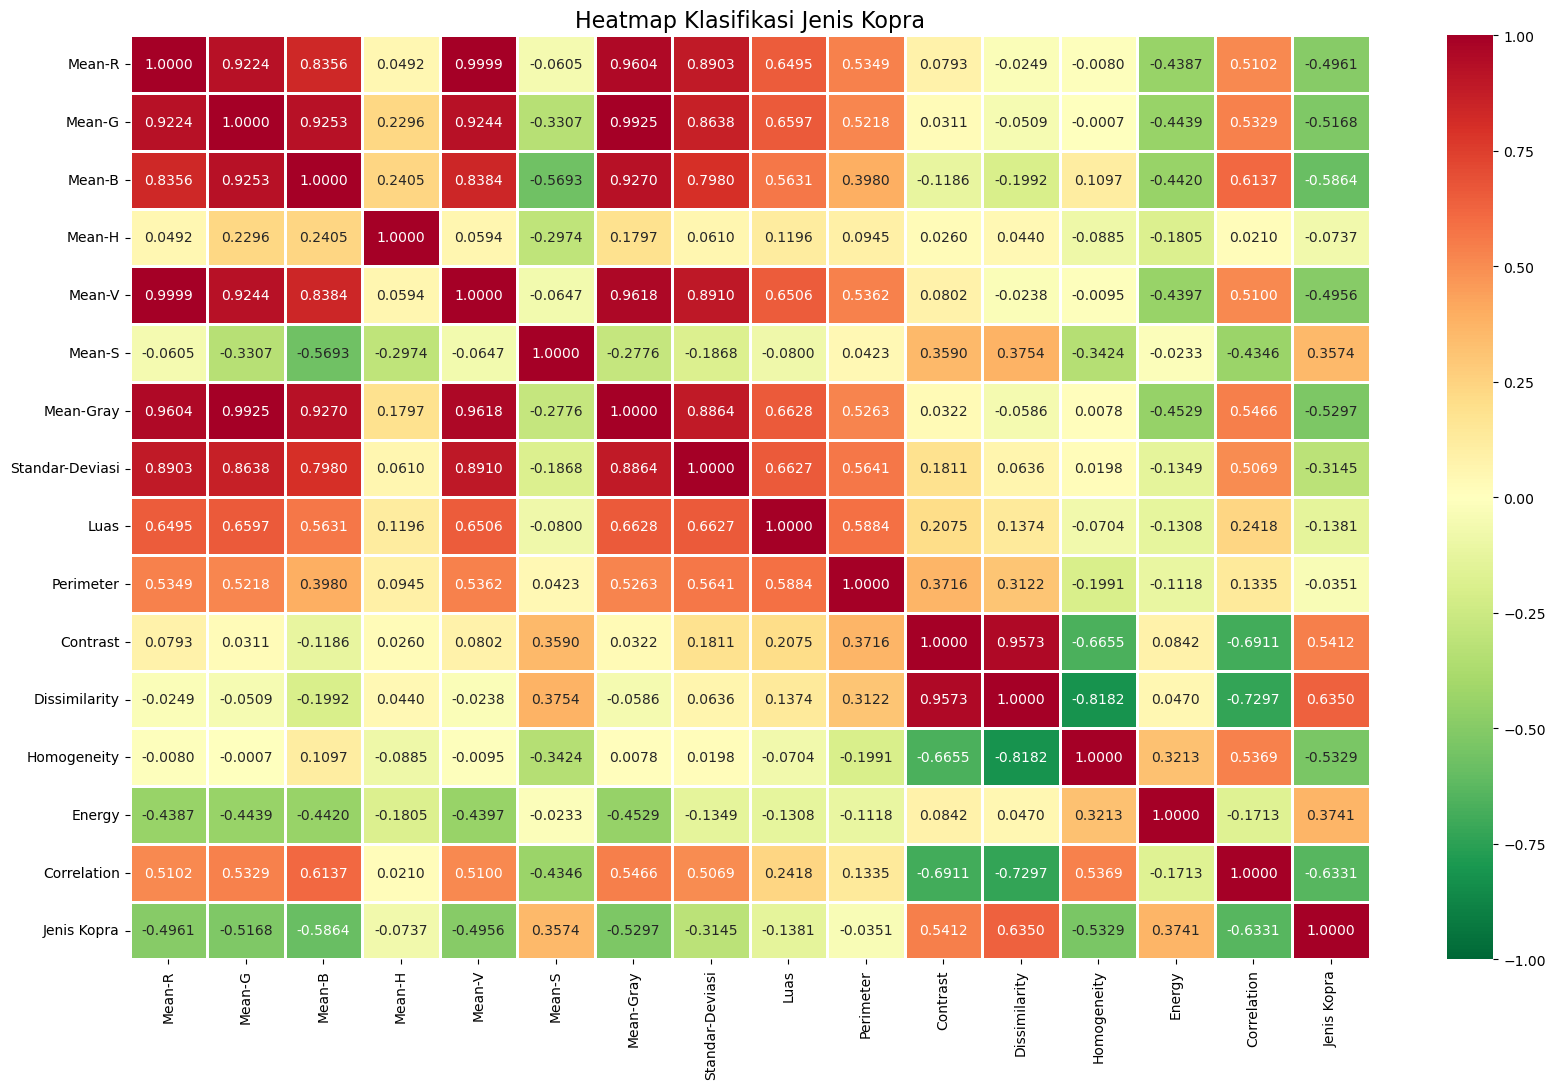

In [6]:
# membuat perhitungan korelasi terlebih dahulu
df_corr = dataset.corr(method="pearson")

# membuat frame heatmap
fig,ax = plt.subplots(figsize=(20,12))

# proses visual heatmap
# => pilihan warna lain untuk visual heatmap (coolwarm, Blues, RdYlGn_r, viridis, YlGnBu)
sns.heatmap(df_corr, cmap="RdYlGn_r", vmax=1, vmin=-1, annot=True, linewidths=1, fmt='.4f', ax=ax)

# membuat title atau judul
plt.title("Heatmap Klasifikasi Jenis Kopra", fontsize=16)

# Menampilkan hasil visualisasi
plt.show()

## 3. Praproses Data

- Setting experiment

In [7]:
# # 1. skenario W
# x = dataset.iloc[:,0:8].values

# 2. skenario B
# x = dataset.iloc[:,8:10].values

# # 3. skenario T
# x = dataset.iloc[:,10:15].values

# # 4. Skenario W dan B
# x = dataset.iloc[:,0:10].values

# 5. Skenario W dan T
# x = dataset.iloc[:,0:13].values

# # 6. Skenario B dan T
# x = dataset.iloc[:,8:15].values

# # 7. Skenario W,B,dan T
x = dataset.iloc[:,0:15].values

# Taget, Jenis Kopra
y = dataset.iloc[:,[-1]].values
y = y.reshape(len(y))

In [8]:
# feature
np.round(x[:5],4)

array([[9.9773500e+01, 8.5299300e+01, 7.2579300e+01, 1.1272000e+01,
        9.9790600e+01, 5.1024400e+01, 8.8194400e+01, 5.4589300e+01,
        7.9335000e+03, 2.0533048e+03, 4.3446600e+01, 3.3410000e+00,
        4.8200000e-01, 2.2820000e-01, 9.9270000e-01],
       [1.1416270e+02, 1.1042490e+02, 9.1145800e+01, 1.9004400e+01,
        1.1482820e+02, 3.6871800e+01, 1.0935810e+02, 7.9939300e+01,
        3.3489000e+04, 1.3348469e+03, 6.8707300e+01, 4.1415000e+00,
        4.7370000e-01, 2.7630000e-01, 9.9460000e-01],
       [8.6758700e+01, 7.7095800e+01, 5.8220200e+01, 1.4373900e+01,
        8.6760400e+01, 5.8789900e+01, 7.7833500e+01, 5.2085100e+01,
        1.9585000e+03, 5.7385490e+02, 3.7735000e+01, 2.9174000e+00,
        5.2210000e-01, 2.3550000e-01, 9.9300000e-01],
       [8.0397600e+01, 7.1179400e+01, 5.5914600e+01, 1.2919400e+01,
        8.0399500e+01, 5.2578400e+01, 7.2236500e+01, 5.2309300e+01,
        2.9080000e+03, 8.6297470e+02, 3.4472300e+01, 2.6061000e+00,
        5.6490000e-01,

In [9]:
# label
np.round(y[:-1])

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

- Normalisasi MinMax

In [10]:
# normalize features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [11]:
np.round(x[:5],4)

array([[0.6636, 0.6414, 0.6765, 0.0835, 0.6637, 0.2913, 0.6519, 0.4846,
        0.0461, 0.3391, 0.0698, 0.1371, 0.5084, 0.1479, 0.9514],
       [0.8016, 0.8869, 0.8975, 0.1631, 0.8079, 0.1625, 0.8618, 0.8451,
        0.1947, 0.2205, 0.1517, 0.229 , 0.484 , 0.2742, 0.9767],
       [0.5388, 0.5613, 0.5056, 0.1155, 0.5388, 0.362 , 0.5491, 0.449 ,
        0.0114, 0.0948, 0.0512, 0.0885, 0.625 , 0.1671, 0.9557],
       [0.4778, 0.5034, 0.4782, 0.1005, 0.4778, 0.3054, 0.4936, 0.4522,
        0.0169, 0.1425, 0.0407, 0.0527, 0.7493, 0.2417, 0.9645],
       [0.6558, 0.678 , 0.6223, 0.1154, 0.6558, 0.3368, 0.6662, 0.615 ,
        0.1853, 0.1166, 0.0959, 0.1046, 0.6785, 0.225 , 0.964 ]])

- Split Data Testing dan Data Training

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

## 4. Metode Klasifikasi 

- K-Nearest-Neighbor

In [14]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2, metric='minkowski').fit(x_train,y_train).predict(x_test)

- Support Vector Machine

In [15]:
svm = SVC(kernel='rbf', random_state=1234).fit(x_train,y_train).predict(x_test)

- Decision Tree (C45)

In [16]:
c45 = DecisionTreeClassifier(criterion="gini", random_state=1234).fit(x_train,y_train).predict(x_test)

- Random Forest

In [17]:
rf = RandomForestClassifier(criterion="gini", random_state=1234).fit(x_train,y_train).predict(x_test)

- Naive Bayes

In [18]:
nb = MultinomialNB().fit(x_train,y_train).predict(x_test)

- Logistic Regression

In [19]:
lr = LogisticRegression(random_state=1234).fit(x_train, y_train).predict(x_test)

## 5. Evaluasi Model

In [20]:
hasil = pd.DataFrame({
    "K Nearest-Neighbor": knn,
    "Suport Vector Machine": svm,
    "Decision Tree": c45,
    "Random Forest": rf,
    "Naive Bayes": nb,
    "Logistic Regresi": lr,
    "Target": y_test
})

In [21]:
for i in range(len(hasil.columns)-1):
    print(hasil.columns[i])
    print("Accuracy \t: ", np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
    print("Precision \t: ", np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("Recall \t\t: ", np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("F1 Score \t: ", np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("------------------------- \n")

K Nearest-Neighbor
Accuracy 	:  0.8424
Precision 	:  0.8409
Recall 		:  0.8365
F1 Score 	:  0.837
------------------------- 

Suport Vector Machine
Accuracy 	:  0.8424
Precision 	:  0.8358
Recall 		:  0.836
F1 Score 	:  0.8359
------------------------- 

Decision Tree
Accuracy 	:  0.7989
Precision 	:  0.7928
Recall 		:  0.7936
F1 Score 	:  0.7931
------------------------- 

Random Forest
Accuracy 	:  0.8804
Precision 	:  0.8758
Recall 		:  0.8766
F1 Score 	:  0.8759
------------------------- 

Naive Bayes
Accuracy 	:  0.8261
Precision 	:  0.8215
Recall 		:  0.8205
F1 Score 	:  0.8209
------------------------- 

Logistic Regresi
Accuracy 	:  0.8207
Precision 	:  0.8129
Recall 		:  0.8139
F1 Score 	:  0.813
------------------------- 



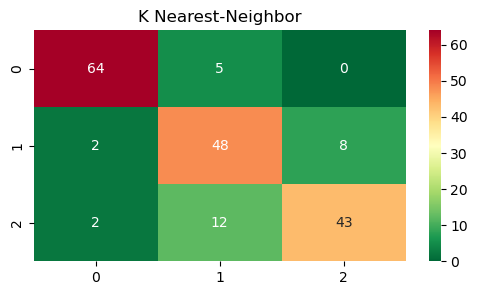

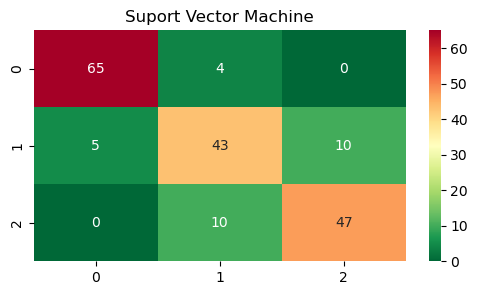

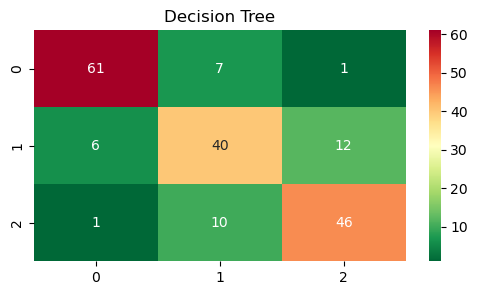

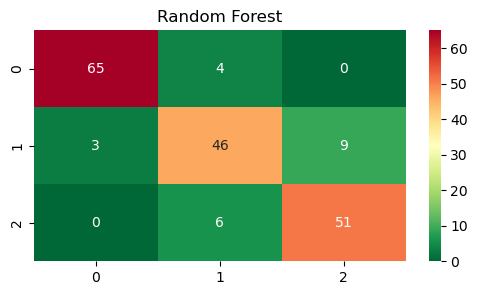

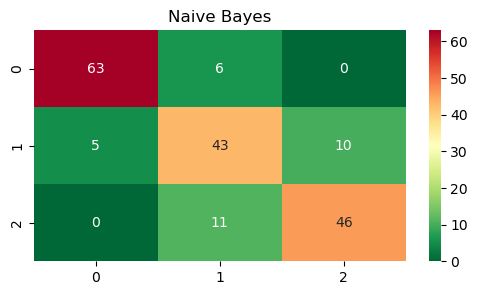

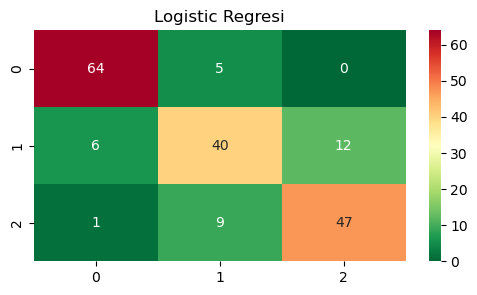

In [22]:
for i in range(len(hasil.columns)-1):
    fig,ax = plt.subplots(figsize=(6,3))
    sns.heatmap(confusion_matrix(hasil["Target"], hasil.iloc[:,i:i+1]),annot=True, cmap="RdYlGn_r")
    plt.title(hasil.columns[i], fontsize=12)
    plt.show()

## 6. Ensambel Learning Classifier

In [23]:
from sklearn.ensemble import VotingClassifier, VotingRegressor

In [24]:
clf1 = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2, metric='minkowski')
clf2 = SVC(kernel='rbf', random_state=1234, probability=True)
clf3 = DecisionTreeClassifier(random_state=1234)
clf4 = RandomForestClassifier(random_state=1234)
clf5 = MultinomialNB()
clf6 = LogisticRegression(random_state=1234)

In [25]:
clf = VotingClassifier(
     estimators=[
         ('knn', clf1),
         ('svm', clf2),
         ('dt', clf3),
         ('rf', clf4),
         ('nb', clf5),
         ('lr', clf6)
     ], voting='soft'
 )

In [26]:
prediksi = clf.fit(x_train, y_train).predict(x_test)

In [27]:
prediksi

array([2, 1, 3, 1, 2, 2, 2, 3, 1, 2, 2, 1, 2, 3, 1, 3, 2, 3, 2, 1, 3, 2,
       2, 3, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 2, 3, 1, 1, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 3,
       3, 1, 3, 2, 2, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 2, 3, 2, 1, 1, 3, 3,
       3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 3,
       3, 2, 2, 3, 1, 1, 2, 2, 3, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 1, 3,
       3, 1, 1, 2, 1, 1, 3, 3, 3, 2, 1, 3, 3, 2, 3, 2, 1, 1, 1, 2, 1, 3,
       1, 2, 1, 3, 1, 1, 3, 1, 3, 2, 3, 2, 1, 1, 2, 1, 1, 2, 1, 3, 2, 2,
       3, 1, 2, 3, 3, 2, 2, 2], dtype=int64)

In [28]:
print("Accuracy \t: ", np.round(accuracy_score(y_test, prediksi), 4))
print("Precision \t: ", np.round(precision_score(y_test, prediksi, average="macro"), 4))
print("Recall \t\t: ", np.round(recall_score(y_test, prediksi, average="macro"), 4))
print("F1 Score \t: ", np.round(f1_score(y_test, prediksi, average="macro"), 4))

Accuracy 	:  0.875
Precision 	:  0.87
Recall 		:  0.8696
F1 Score 	:  0.8696


              precision    recall  f1-score   support

           1       0.97      0.96      0.96        69
           2       0.80      0.83      0.81        58
           3       0.84      0.82      0.83        57

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



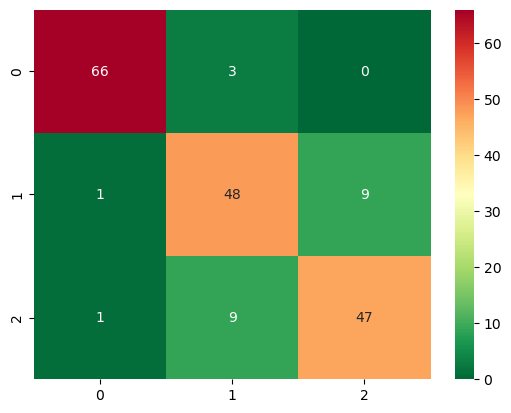

In [29]:
#confusion matrix dan classificatio report
print(classification_report(y_test, prediksi))
sns.heatmap(confusion_matrix(y_test, prediksi),annot=True, cmap="RdYlGn_r")
plt.show()